### <font size=8 face='Comic Sans MS' color=" #c0392b "><left><b>STORE SALES</font>

### <font size=5 face='Comic Sans MS' color="#F28C28"><left><b>Importing Packages</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# from matplotlib import rcParams

In [5]:
df = pd.read_csv('G:\Data Science - TYPE A\Guvi\Project\\train 2.csv')

In [6]:
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [7]:
# Changing column to date format
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date'].max()-df['date'].min()

Timedelta('1825 days 00:00:00')

In [9]:
# df.groupby(['store'])['sales'].max().sort_values()
print(df.groupby(['store'])['sales'].mean().sort_values())
print(df.groupby(['store'])['sales'].sum().sort_values())
# highest sales by Store 2>8>3 and lowest is 7<6<5

store
7     36.363735
6     39.733516
5     39.770164
1     47.268379
4     54.902946
9     55.049025
10    58.709288
3     59.530602
8     64.142048
2     67.033165
Name: sales, dtype: float64
store
7     3320009
6     3627670
5     3631016
1     4315603
4     5012639
9     5025976
10    5360158
3     5435144
8     5856169
2     6120128
Name: sales, dtype: int64


In [10]:
df.groupby('item')['sales'].mean().sort_values(ascending=False)

item
15    88.030778
28    87.881325
13    84.316594
18    84.275794
25    80.686418
45    80.584173
38    80.521906
22    80.502245
36    77.028916
8     76.950055
10    73.227437
11    69.656353
12    69.634940
29    69.618839
33    69.560953
24    66.044633
50    65.882202
35    65.801807
14    58.681873
31    58.644304
46    58.639869
2     58.574151
7     58.531051
6     58.503888
9     51.389869
48    51.352848
43    51.294359
26    47.644085
20    47.515936
32    43.981763
39    43.883406
19    40.355531
30    40.337021
21    40.317087
42    36.688116
3     36.642223
17    32.994852
44    29.398193
49    29.335323
23    29.297864
37    29.258379
40    29.249398
34    25.735761
16    25.656079
27    22.049726
4     22.010241
47    22.003341
41    22.002136
1     21.981599
5     18.358708
Name: sales, dtype: float64

In [11]:
# To get number of each items sold per store

for i in df['store'].unique():
    if i == 1:
        # Creating a df 
        item_sale = pd.DataFrame(df.loc[df['store']==i].groupby('item')
                     ['sales'].sum().sort_values(ascending=False))
    else:
        # Adding columns
        item_sale['sales_store'+str(i)] = df.loc[df['store']==i].groupby('item')['sales'].sum()
        

In [12]:
# Top 5 most sold items in each store

# item_sale.style.highlight_max(color = 'lightgreen', axis = 0)
item_sale.style.highlight_quantile(axis=0, q_left=0.9, color="lightgreen")

In [13]:
# df.groupby(pd.Grouper(key='date',axis=0,freq='M')).sum()
df.groupby(['date','item'])['sales'].sum()
# plt.plot

date        item
2013-01-01  1       133
            2       327
            3       172
            4       102
            5        83
                   ... 
2017-12-31  46      605
            47      211
            48      494
            49      285
            50      626
Name: sales, Length: 91300, dtype: int64

In [14]:
df.groupby(['store','item'])['date','sales'].mean()

sales
store item           
1     1     19.971522
      2     53.148959
      3     33.208105
      4     19.956188
      5     16.612815
...               ...
10    46    66.046550
      47    24.755750
      48    57.814896
      49    33.032311
      50    74.037240

[500 rows x 1 columns]

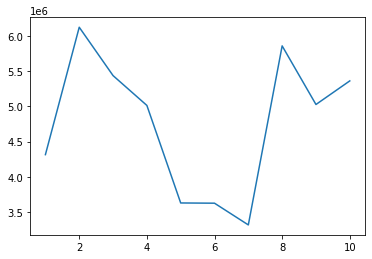

In [31]:
x = df['store'].unique()
y = df.groupby(df['store'])['sales'].sum()
plt.plot(x,y)
plt.show()

Text(0.5, 1.0, 'Sales per month for each store')

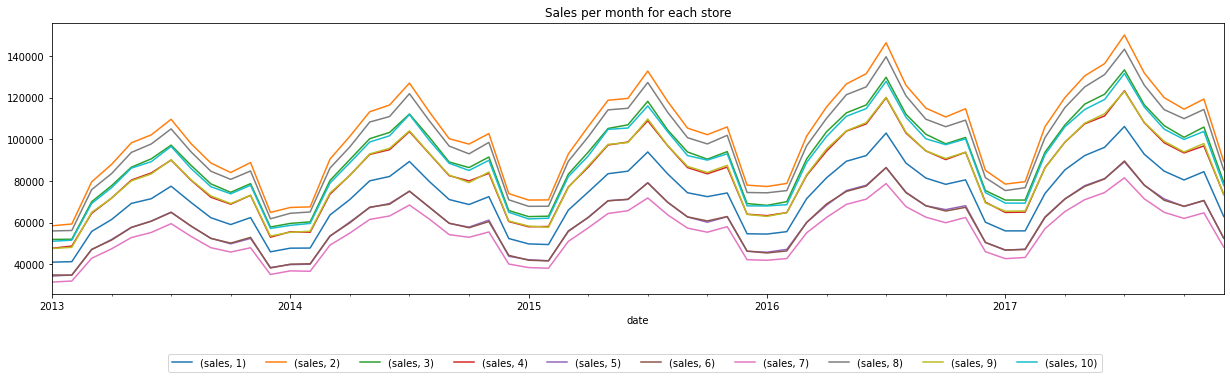

In [15]:
# Total sale in each store on monthly basis
sales_per_store = (
    df
    .groupby(['date', 'store'])
    .aggregate({'sales': 'sum'})
    .unstack()
    .resample('1M')
    .sum()
)
sales_per_store.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=10)
plt.title("Sales per month for each store")

### Looking for 1 product and predicting its sales

Text(0.5, 1.0, 'Sales per month for each item')

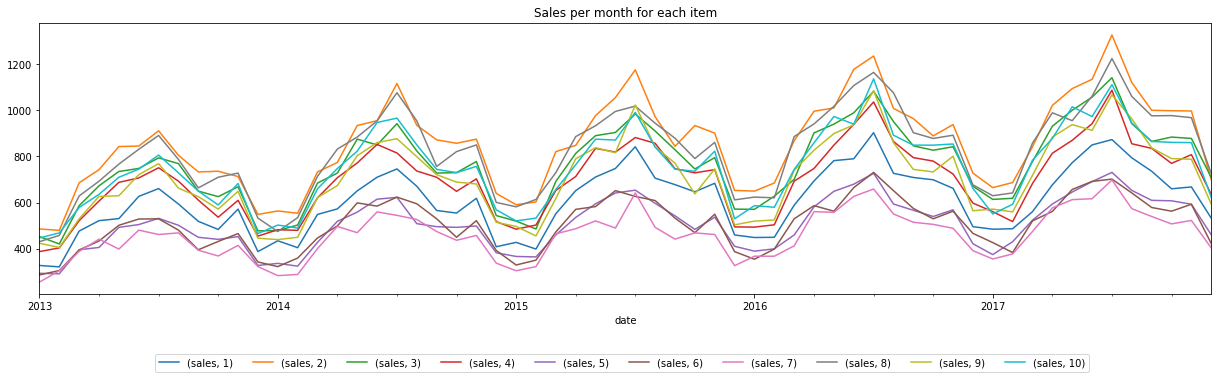

In [16]:
# Sale of item "1" across all stores on monthly basis
sales_per_store = (
    df.loc[df['item']==1]
    .groupby(['date', 'store'])
    .aggregate({'sales': 'sum'})
    .unstack()
    .resample('1M')
    .sum()
)
sales_per_store.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=10)
plt.title("Sales per month for each item")

Text(0.5, 1.0, 'Sales per month for item #15')

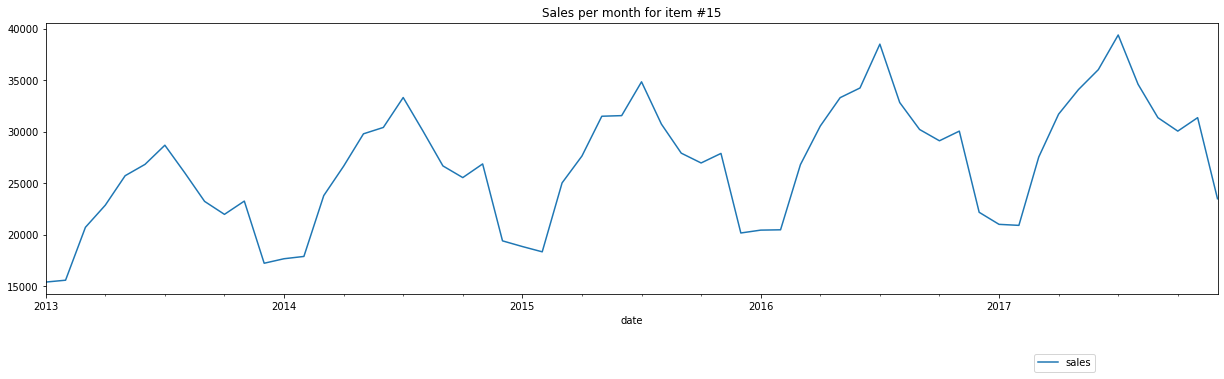

In [17]:
# Sale of item "1" across all stores(Total) on monthly basis
item_sales = (
    df.loc[df['item']==15]
    .groupby(['date'])
    .aggregate({'sales': 'sum'})
    .resample('1M')
    .sum()
)
item_sales.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=10)
plt.title("Sales per month for item #15")
# plt.xticks(df['date'].dt.month)

# Sales of item #15 per day, considering all stores.

<AxesSubplot:xlabel='date'>

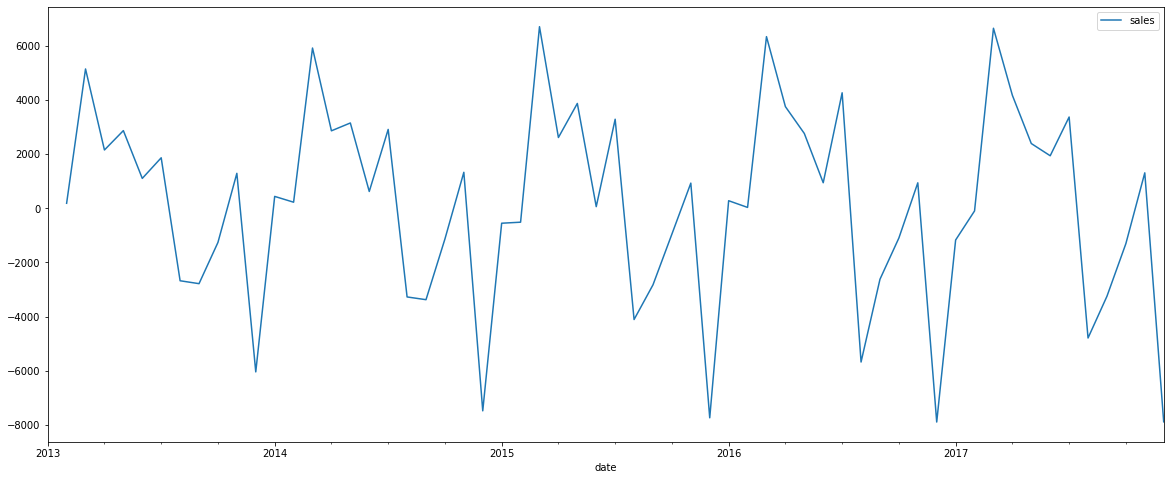

In [18]:
# Removing the trend to compare sales each year
no_trend = item_sales.diff()#item_sales.shift())
no_trend.plot(figsize=(20,8))


<AxesSubplot:xlabel='date'>

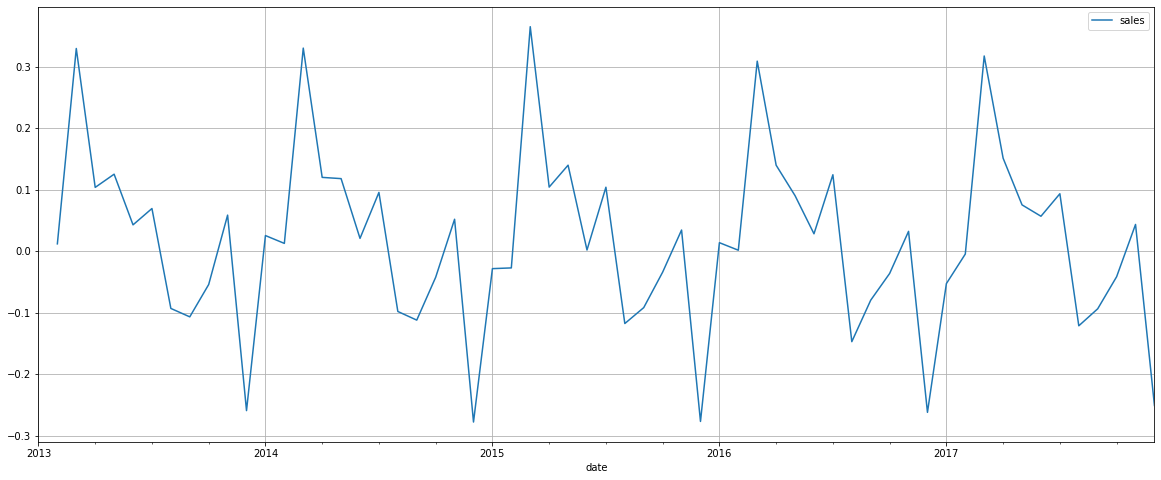

In [19]:
# Percentage change year by year
item_sales.pct_change().plot(figsize=(20,8),grid=True)

In [20]:
item_sales2 = (
    df.loc[df['item']==5]
    .groupby(['date'])
    .aggregate({'sales': 'sum'})
    .resample('1M')
    .sum()
)

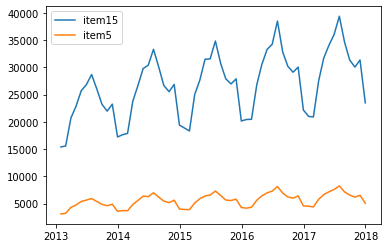

In [21]:
# Comparing the sales of most and least sold item
# Without normalization
plt.plot(item_sales.index,item_sales)
plt.plot(item_sales.index,item_sales2)
plt.legend(['item15','item5'])
plt.show()

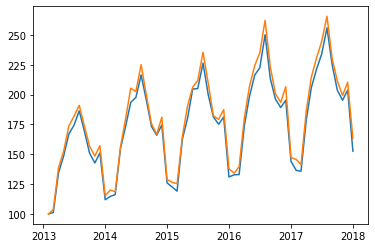

In [22]:
# Comparing the sales of most and least sold item
# After normalization
item_sales_norm = item_sales.div(item_sales.iloc[0]).mul(100)
item_sales2_norm = item_sales2.div(item_sales2.iloc[0]).mul(100)
plt.plot(item_sales.index,item_sales_norm)
plt.plot(item_sales.index,item_sales2_norm)
plt.show()

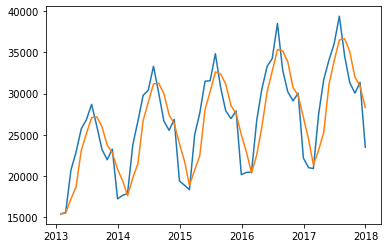

In [23]:
# Rolling over 90 days window to calculate mean
roll = item_sales.rolling('90D').mean()
plt.plot(item_sales.index,item_sales)
plt.plot(roll.index,roll)

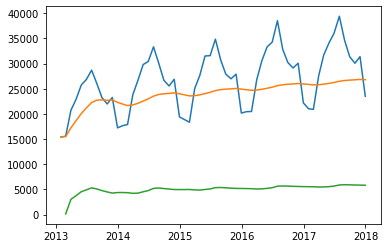

In [24]:
# expanding window to calculate mean
xpnd_m = item_sales.expanding().mean()
xpnd_std = item_sales.expanding().std()

plt.plot(item_sales.index,item_sales)
plt.plot(item_sales.index,xpnd_m)
plt.plot(item_sales.index,xpnd_std)

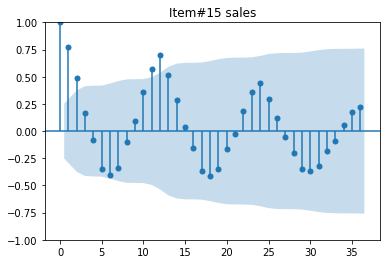

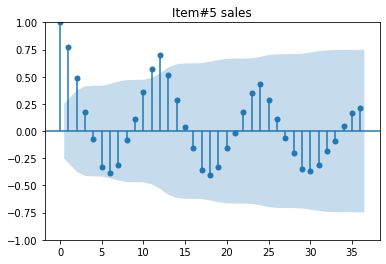

In [50]:
# Corelation of a feature with itself but with time delay of 30 days
plot_acf(item_sales,lags=36,title = 'Item#15 sales')
plot_acf(item_sales2,lags=36,title = 'Item#5 sales')
plt.show()

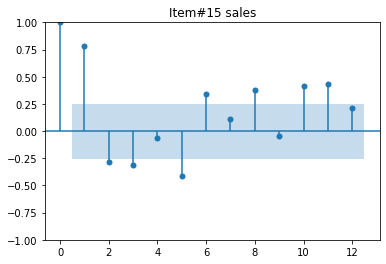

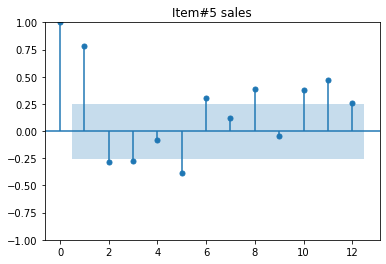

In [53]:
plot_pacf(item_sales,lags=12,title = 'Item#15 sales')
plot_pacf(item_sales2,lags=12,title = 'Item#5 sales')
plt.show()
# Statistical significane for 1st and 11th lag is high

<Figure size 792x648 with 0 Axes>

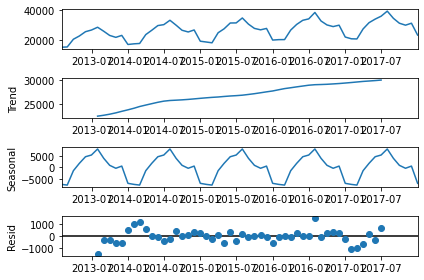

In [27]:
plt.figure(figsize=(11,9))
item_sales_decom = sm.tsa.seasonal_decompose(item_sales)
fig = item_sales_decom.plot()
plt.show()
# There is uptrend and uniform seasonal change

In [56]:
# To check if events are random walk (i.e. To Check if time series is stationary)

''' If the test statistic is less than the critical value, 
we can say that time series is stationary.
2. If p_values is less than 0.05 then 
'''

print(adfuller(item_sales)[1],adfuller(item_sales2)[1])
print(adfuller(item_sales)[4],adfuller(item_sales2)[4])
print("As the p_value are lesser than 0.05 we can reject the null")
print('Hence events are not a random walk')

1.724297820164643e-05 0.001681298856297198
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777} {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
As the p_value are lesser than 0.05 we can reject the null
Hence events are not a random walk


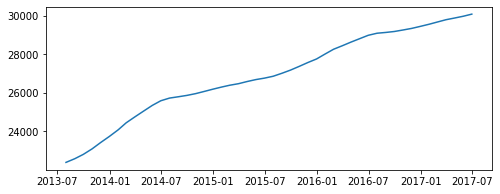

In [29]:
fig = plt.figure(figsize=(8,3))
plt.plot(item_sales_decom.trend)

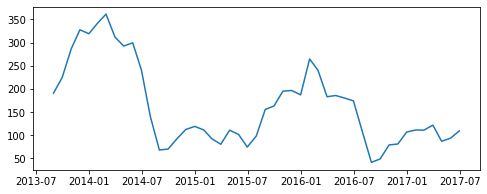

In [30]:
fig = plt.figure(figsize=(8,3))
plt.plot(item_sales_decom.trend.diff())

In [32]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [33]:
sale_day = df.groupby(df['date'])['sales'].sum()
sale_day = pd.DataFrame(sale_day)
# sale_day['date'] = sale_day.index
# sale_day.reset_index(drop=True)

In [34]:
sale_day.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [35]:
fig = go.Figure(data=go.Scatter(x=sale_day.index, y=sale_day['sales']))  
fig.update_layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig.show()

Plotting AR model


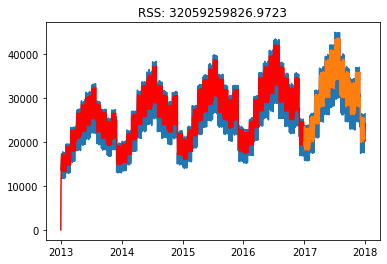

In [45]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sale_day,order=(2,1,0))
results_AR = model.fit()
plt.plot(sale_day)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot(results_AR.predict(pd.datetime(2016,12,27),pd.datetime(2017,12,27),color='yellow'))
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - sale_day['sales'])**2))
print('Plotting AR model')